In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sprinter
import getpass

In [3]:
qfib_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/WholeBrain_TCK/'
qfib_ext = '.tck'
dpy_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/WholeBrain_TCK/'
dpy_ext = '.tck'
tko_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/WholeBrain_VTK/'
tko_ext = '.vtk'

files = []#['CA', 'CC', 'CP']
for f in os.listdir(tko_dir):
    if f.endswith('vtk'):
        files.append(f.split('.')[0])
        
# files = files[0:2]

input_size = 0
for f in files:
    print(os.path.join(tko_dir, f+tko_ext), os.path.getsize(os.path.join(tko_dir, f+tko_ext)))
    input_size += os.path.getsize(os.path.join(tko_dir, f+tko_ext))
input_size /= float(len(files))

qfib_files = [(qfib_dir, f+qfib_ext) for f in files]
qfib_bits = [8, 16]
tko_files = [(tko_dir, f+tko_ext) for f in files]
tko_bits = [9,10]
dpy_files =  [(dpy_dir, f+dpy_ext) for f in files]


/home/haehn/Dropbox/TRAKODATA/WholeBrain_VTK/RealTractDataIncludingTensorsAndScalars.vtk 187084312


In [4]:
files

['RealTractDataIncludingTensorsAndScalars']

In [5]:
dpy_sizes, dpy_errors, dpy_stds, dpy_advstats = sprinter.Sprinter.run_dpy(qfib_files)

In [6]:
qfib_sizes, qfib_errors, qfib_stds, qfib_advstats = sprinter.Sprinter.run_qfib(qfib_files, qfib_bits)

In [7]:
runs = {}

In [8]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, binary=False)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

In [9]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}_binary'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, binary=True)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

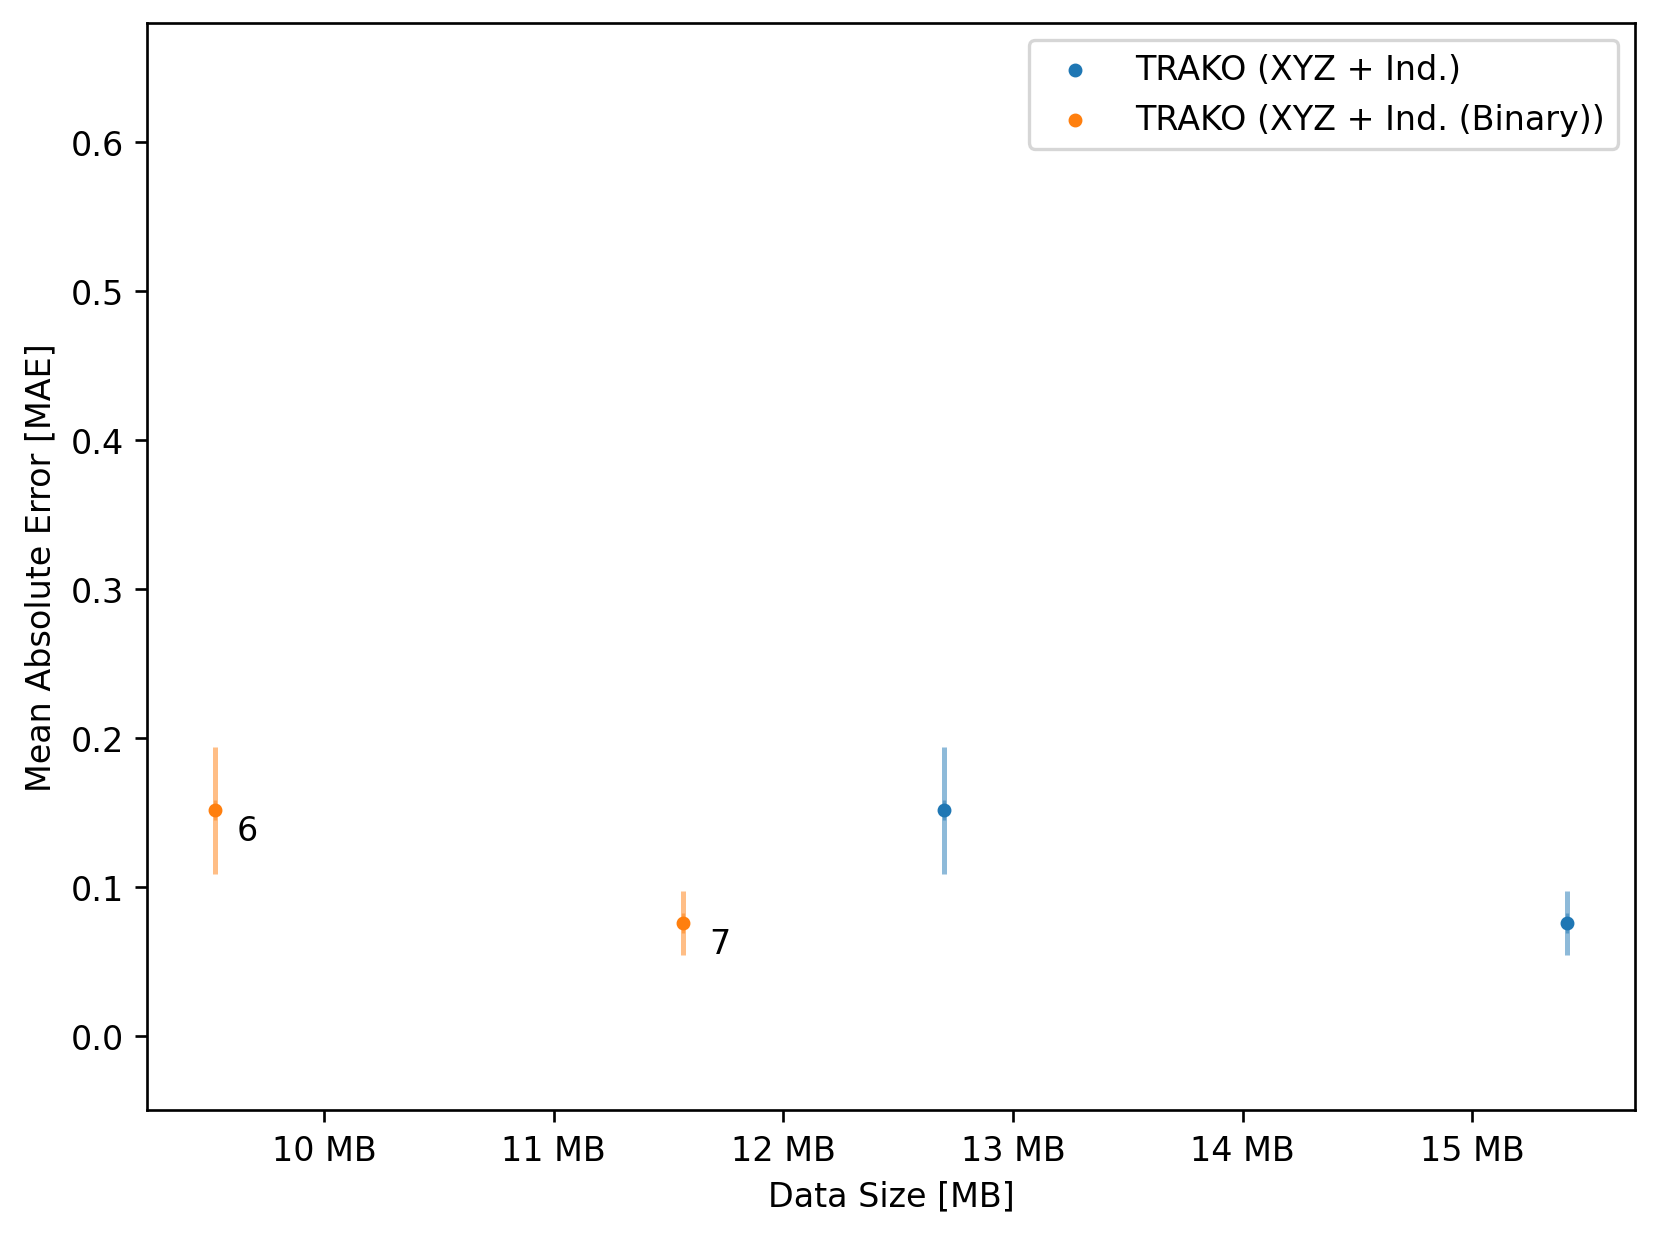

In [10]:
# sprinter.Sprinter.bitsplot(plt, tkoruns=runs, qfibruns=[qfib_sizes, qfib_errors, qfib_stds], ylim=(0,1), filename='/tmp/out.pdf')
sprinter.Sprinter.bitsplot(plt, tkoruns=runs, ylim=(-.05,.68), filename='/tmp/WholeBrain_Full.pdf')

In [11]:
print(input_size/1000000)

187.084312


In [12]:
qfib_sizes, qfib_errors, qfib_stds, qfib_advstats = sprinter.Sprinter.run_qfib(qfib_files, qfib_bits)

In [13]:
sprinter.Sprinter.createtable('qfib-data', input_size, {'qfib': [qfib_sizes, qfib_errors, qfib_stds, qfib_advstats]}, selector=1)

~~~qfib & 14.68M & 92.154$\times$ & 12.746\% & 0.0 & 53.381 & 0.475$\pm$0.375 & 0.0 & 53.381 & 0.442$\pm$0.442 & 15.647 & 2.408\\


In [14]:
sprinter.Sprinter.createtable('qfib-data', input_size, {'dpy': [dpy_sizes, dpy_errors, dpy_stds, dpy_advstats]}, selector=0)

~~~dpy & 73.68M & 60.616$\times$ & 2.539\% & 0.0 & 0 & 0.0$\pm$0.0 & 0.0 & 0 & 0.0$\pm$0.0 & 23.993 & 2532.927\\


In [15]:
sprinter.Sprinter.createtable('qfib-data', input_size, runs, selector=1)

~~~TRAKO & 15.41M & 91.76$\times$ & 12.137\% & 0.0 & 0.136 & 0.076$\pm$0.021 & 0.002 & 0.135 & 0.076$\pm$0.012 & 9.526 & 5.996\\
~~~TRAKO (Binary) & 11.56M & 93.82$\times$ & 16.182\% & 0.0 & 0.136 & 0.076$\pm$0.021 & 0.002 & 0.135 & 0.076$\pm$0.012 & 9.192 & 6.019\\


In [17]:
DATASETNAME = 'Wholebrain (tracts only)'

import collections
all_runs = collections.OrderedDict()
all_runs['qfib (8bit)'] = [0, qfib_sizes, qfib_errors, qfib_stds, qfib_advstats]
all_runs['qfib (16bit)'] = [1, qfib_sizes, qfib_errors, qfib_stds, qfib_advstats]
all_runs['zfib'] = [0, dpy_sizes, dpy_errors, dpy_stds, dpy_advstats]

for r in runs.keys():
    all_runs[r] = [0] + runs[r]
    
sprinter.Sprinter.createfulltable(DATASETNAME, input_size, all_runs)

\textbf{Wholebrain (tracts only)} & 187.08M\\
~~~qfib (8bit)~\cite{mercier2020qfib} & 9.33M & 95.01$\times$ & 20.041\% & 0.0 & 53.695 & 0.452$\pm$0.235 & 0.0 & 53.695 & 0.282$\pm$0.282 & 14.954 & 2.027\\
~~~qfib (16bit)~\cite{mercier2020qfib} & 14.68M & 92.154$\times$ & 12.746\% & 0.0 & 53.381 & 0.475$\pm$0.375 & 0.0 & 53.381 & 0.442$\pm$0.442 & 15.647 & 2.408\\
~~~zfib/Dipy~\cite{presseau2015new} & 73.68M & 60.616$\times$ & 2.539\% & 0.0 & 0 & 0.0$\pm$0.0 & 0.0 & 0 & 0.0$\pm$0.0 & 23.993 & 2532.927\\
~~~TRAKO & 12.7M & 93.213$\times$ & 14.734\% & 0.001 & 0.273 & 0.152$\pm$0.043 & 0.005 & 0.271 & 0.152$\pm$0.025 & 9.575 & 5.963\\
~~~TRAKO (Binary) & 9.52M & 94.91$\times$ & 19.645\% & 0.001 & 0.273 & 0.152$\pm$0.043 & 0.005 & 0.271 & 0.152$\pm$0.025 & 9.091 & 5.921\\
